In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Content of the data
* obj_ID = identificador
* alpha = Right ascension(cambio gradual en el tiempo)
* delta = Declination angle (posicion con respecto a el punto estandar de referencia J2000 epoch)
* u = Ultraviolet filter in the photometric system
* g = Green filter in the photometric system
* r = Red filter in the photometric system
* i = Near Infrared filter in the photometric system
* z = Infrared filter in the photometric system
* run_ID = Run Number ID del escaneo
* rereun_ID = Rerun Number to specify how the image was processed
* cam_col = Camera column to identify the scanline within the run
* field_ID = Field number to identify each field
* spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
* class = clase object class (galaxy, star or quasar object)
* redshift = redshift value based on the increase in wavelength
* plate = plate ID, identifies each plate in SDSS
* MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each * observation

In [2]:
data = pd.read_csv('star_classification.csv')
data.head()
data_modeling = data.copy()

In [3]:
data.columns,data.shape

(Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
        'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
        'plate', 'MJD', 'fiber_ID'],
       dtype='object'),
 (100000, 18))

In [4]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

#### Vizuallize data

In [6]:
number_star_each_class = data["class"].value_counts()
number_star_each_class

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

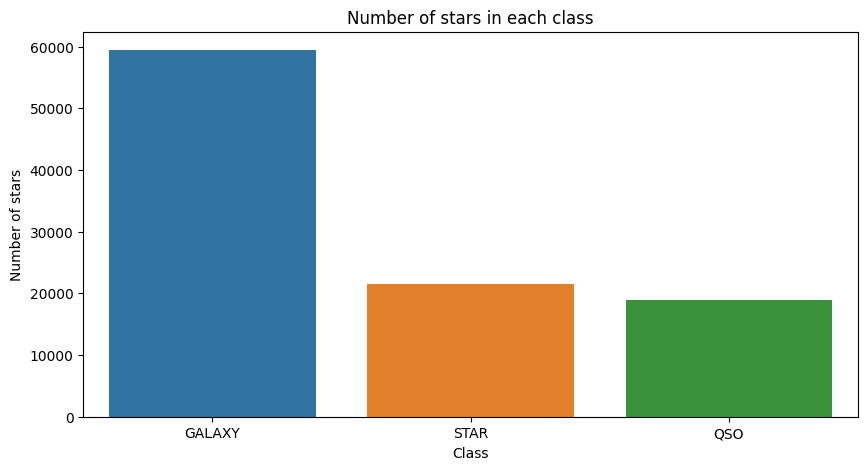

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x=number_star_each_class.index,y=number_star_each_class.values)
plt.title("Number of stars in each class")
plt.xlabel("Class")
plt.ylabel("Number of stars")
plt.show()

We can see the imbalance of data 

/tmp/ipykernel_22300/1408867540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt='.2f')


<AxesSubplot: >

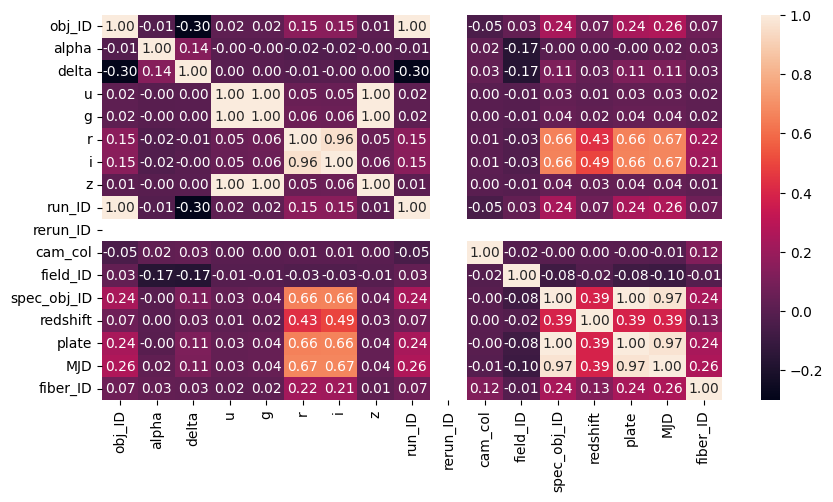

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,fmt='.2f')

In [9]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

### Process missing value

In [10]:
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

### Incositent data

In [11]:
# Get object columns
data["class"].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

### Outlier data

In [12]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [13]:
numeric_columns = [col for col in data.columns if data[col].dtype != 'object']
ID_columns = [col for col in data.columns if "ID" in col]

# remove ID columns
numeric_columns = [col for col in numeric_columns if col not in ID_columns]
numeric_columns

['alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'cam_col',
 'redshift',
 'plate',
 'MJD']

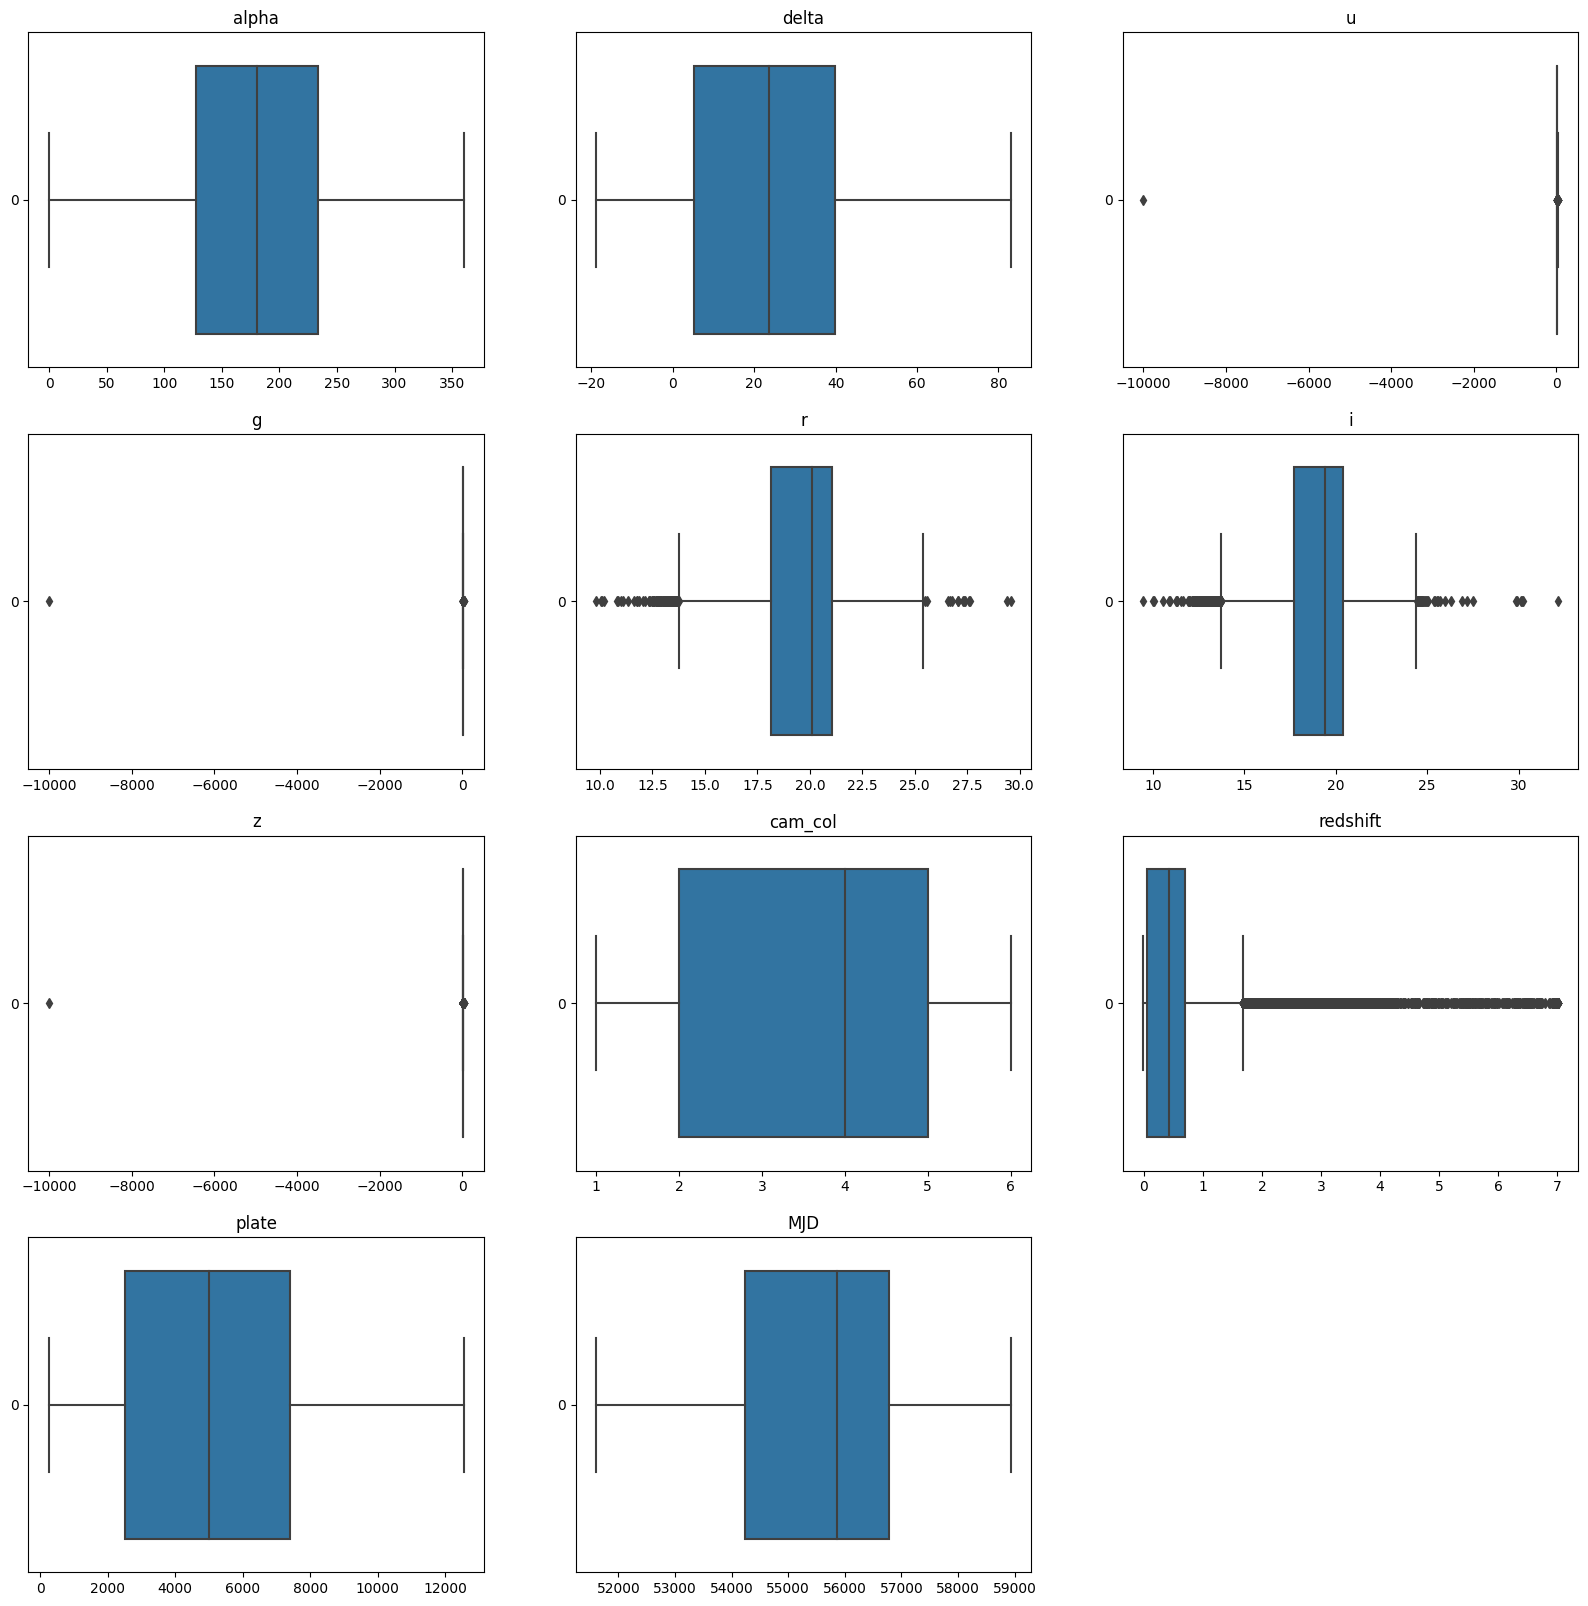

In [14]:
# Plot outlier of each data
plt.figure(figsize=(20,20))
for i,col in enumerate(numeric_columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(data[col],orient='h')
    plt.title(col)
plt.show()

**We can see most oulier in r and i**

In [15]:
data.loc[75,'r']

20.77479

In [16]:
data_outlier = data.copy()

In [17]:
outlier_col = ["r","i","redshift"]

In [18]:
# Find the outlier data
def findDataOutlier(data,feature,conf = 1.5):
    Q1 = np.quantile(data[feature],0.25)
    Q2 = np.quantile(data[feature],0.5)
    Q3 = np.quantile(data[feature],0.75)
    IQR = Q3 - Q1
    upper_bound,lower_bound = Q3+ conf * IQR,Q1 - conf*IQR
    bound = (lower_bound,upper_bound)
    upper_outlier_data = {value:index for index,value in data[feature].items() if value > upper_bound}
    lower_outlier_data = {value:index for index,value in data[feature].items() if value < lower_bound}
    return bound,upper_outlier_data,lower_outlier_data

In [19]:
def processingOutlier(data,feature,target,upper_outlier_data,lower_outlier_data):
    mean_group_target = {star : data[data[target] == star][feature].mean() for star in data[target].unique()}
    # Mapping to columns
    for val,indx in upper_outlier_data.items():
        data_outlier.loc[indx,feature] = mean_group_target[data_outlier.loc[indx,target]]

    for val,indx in lower_outlier_data.items():
        data_outlier.loc[indx,feature] = mean_group_target[data_outlier.loc[indx,target]]
    return data_outlier


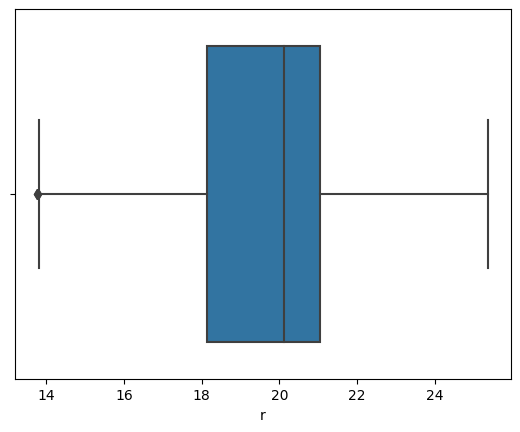

In [20]:
bound,upper_outlier,lower_outlier = findDataOutlier(data_outlier,'r',conf = 1.5)
data_outlier = processingOutlier(data_outlier,'r','class',upper_outlier,lower_outlier)
sns.boxplot(x=data_outlier['r'],orient='h')
plt.show()

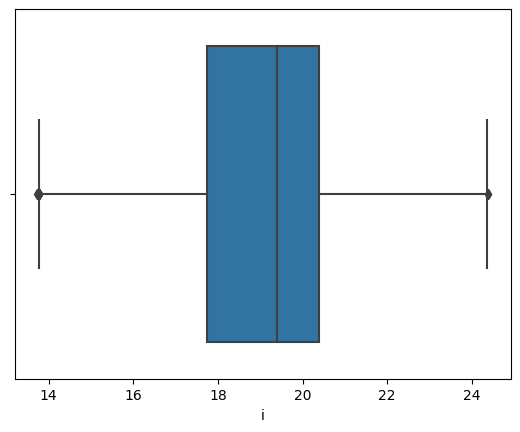

In [21]:
bound,upper_outlier,lower_outlier = findDataOutlier(data_outlier,'i',conf = 1.5)
data_outlier = processingOutlier(data_outlier,'i','class',upper_outlier,lower_outlier)
sns.boxplot(x=data_outlier['i'],orient='h')
plt.show()

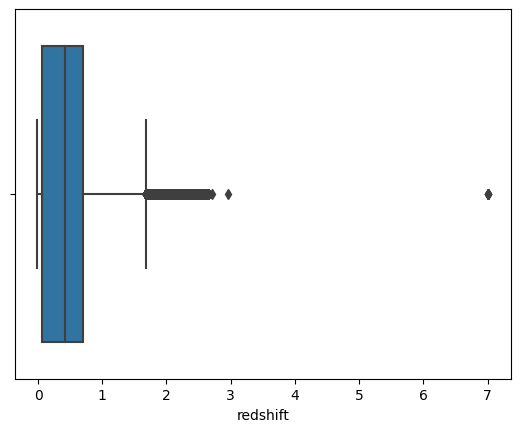

In [22]:
bound,upper_outlier,lower_outlier = findDataOutlier(data_outlier,'redshift',conf = 3)
data_outlier = processingOutlier(data_outlier,'redshift','class',upper_outlier,lower_outlier)
sns.boxplot(x=data_outlier['redshift'],orient='h')
plt.show()

In [23]:
data_modeling = data_outlier

### Process noise data

In [24]:
data_modeling.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.652321,19.092197,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.539218,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.838057,1.734711,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.602323,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,13.775620,13.736340,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.149320,17.749733,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.124815,19.403940,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044200,20.395295,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,25.377300,24.387400,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [25]:
print(f"{data[data['u'] == data['u'].min()].index}")
print(f"{data[data['g'] == data['g'].min()].index}")
print(f"{data[data['z'] == data['z'].min()].index}")
index_noise = data[data['u'] == data['u'].min()].index

Int64Index([79543], dtype='int64')
Int64Index([79543], dtype='int64')
Int64Index([79543], dtype='int64')


In [26]:
data_modeling.drop(index=index_noise,axis= 0,inplace= True)
data_modeling.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Encoding data

In [27]:
data_encoding = data_modeling.copy()

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_encoding["class"] = label_encoder.fit_transform(data_encoding["class"])

In [29]:
data_encoding.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


In [30]:
data_modeling = data_encoding

### Imbalance processing

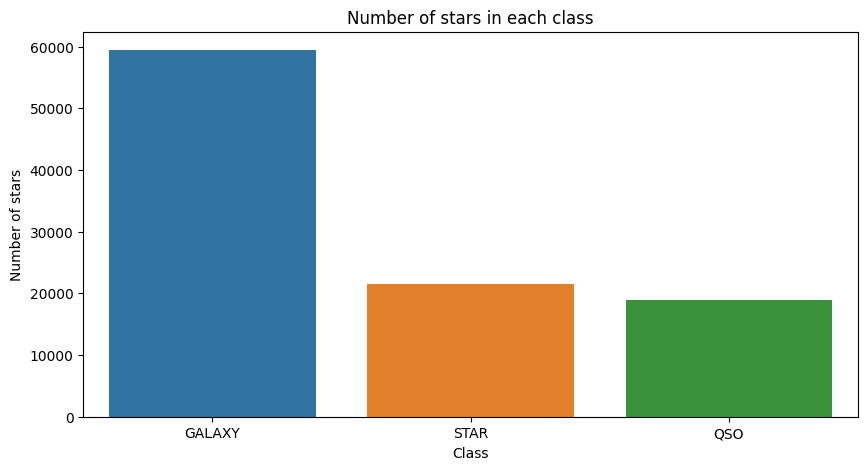

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x=number_star_each_class.index,y=number_star_each_class.values)
plt.title("Number of stars in each class")
plt.xlabel("Class")
plt.ylabel("Number of stars")
plt.show()

In [32]:
number_star_each_class

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

**We can see the value of each star is imbalance at Galaxy so we will split Galaxy two class**

In [33]:
split_point = int(0.5 * number_star_each_class['GALAXY'])
split_point

29722

In [34]:
class_galaxy1 = data_modeling[data_modeling['class'] == 0].sample(n=split_point,random_state= 42)
class_galaxy2 = data_modeling[data_modeling['class'] == 0].drop(class_galaxy1.index)
class_galaxy2.shape,class_galaxy1.shape

((29723, 18), (29722, 18))

In [35]:
data_modeling = data_modeling[data_modeling['class'] != 0]
data_modeling_1 = pd.concat([data_modeling,class_galaxy1],axis= 0)
data_modeling_1.shape

(70276, 18)

In [36]:
data_modeling_2 = pd.concat([data_modeling,class_galaxy2],axis= 0)
data_modeling_2.shape

(70277, 18)

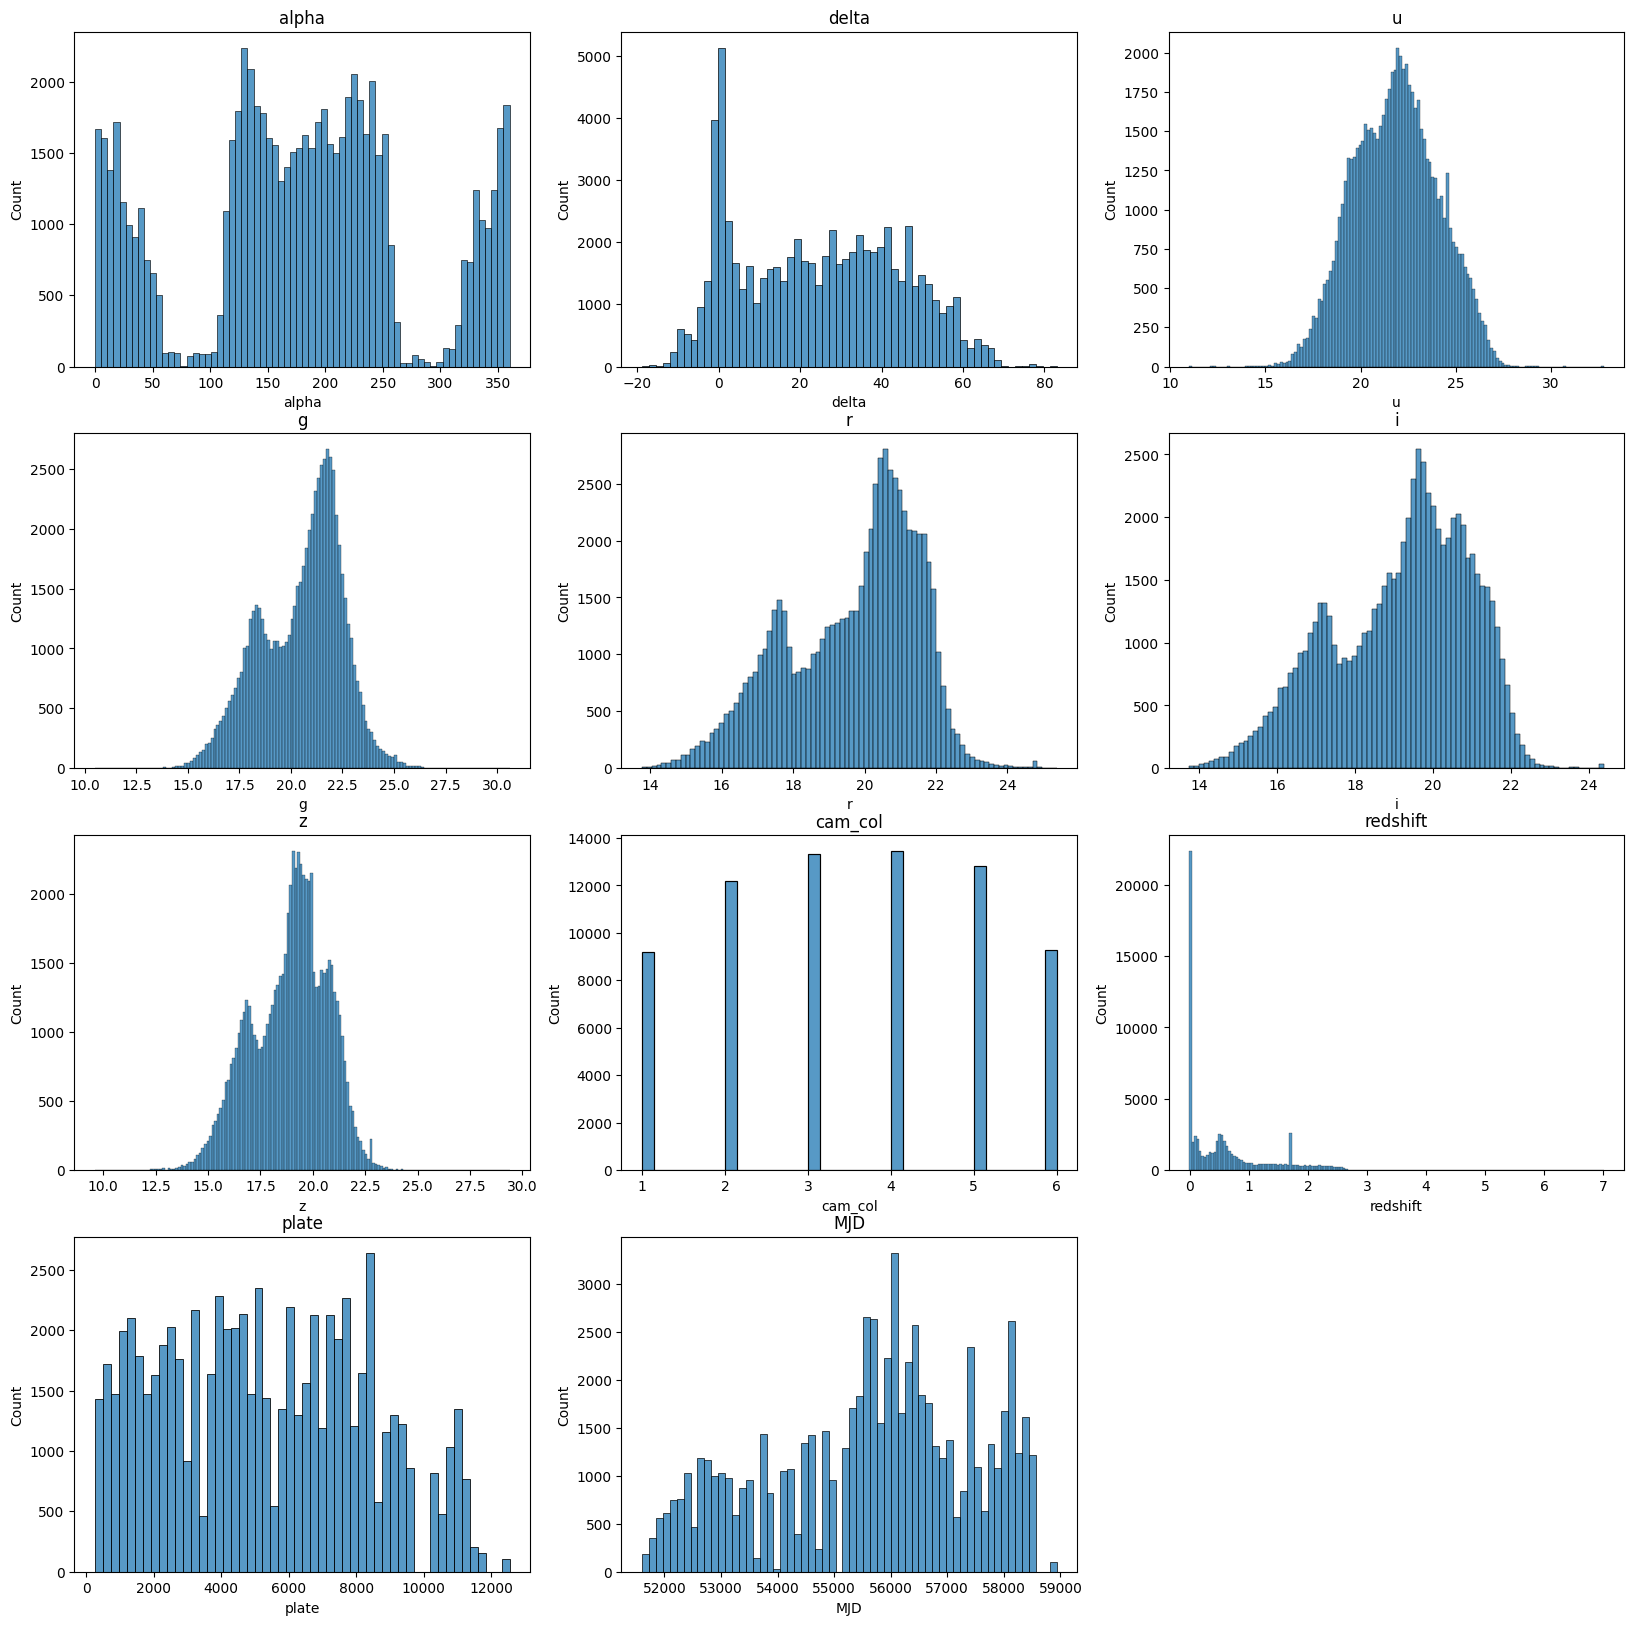

In [37]:
plt.figure(figsize=(20,20))
for i,col in enumerate(numeric_columns):
    plt.subplot(4,3,i+1)
    sns.histplot(data_modeling_1[col])
    plt.title(col)
plt.show()

### Normalize data

In [38]:
ID_columns

['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID']

In [39]:
data_modeling_2.rerun_ID.value_counts()

301    70277
Name: rerun_ID, dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_modeling_1[numeric_columns] = scaler.fit_transform(data_modeling_1[numeric_columns])
data_modeling_2[numeric_columns] = scaler.fit_transform(data_modeling_2[numeric_columns])
data_modeling_1[ID_columns] = scaler.fit_transform(data_modeling_1[ID_columns])
data_modeling_2[ID_columns] = scaler.fit_transform(data_modeling_2[ID_columns])
data_modeling_2.head(),data_modeling_1.head()

(      obj_ID     alpha     delta         u         g         r         i  \
 5   1.842794  1.678562 -0.189957  0.730051  1.412983  0.900283  0.608321   
 6   1.675764 -1.582285 -0.653837 -0.181271  0.330100  0.684916  0.809094   
 9   0.742588 -1.418968  0.190066 -0.056231 -0.241676 -0.274001 -0.211583   
 12  1.870643  1.727888  0.421216  0.587597 -0.186553 -0.140538  0.017700   
 16  1.644996  1.803823 -1.075539  1.208900  0.463576  0.698517  0.914775   
 
            z    run_ID  rerun_ID   cam_col  field_ID  spec_obj_ID  class  \
 5   0.358271  1.842820       0.0 -0.331467 -0.503193    -0.074397      1   
 6   0.849514  1.675851       0.0 -0.960351  1.894562     1.951910      1   
 9  -0.139071  0.742555       0.0  0.297417 -0.421452    -0.940243      2   
 12 -0.005492  1.870732       0.0 -0.960351 -0.993643     0.421197      2   
 16  0.882265  1.644894       0.0  0.926301  0.682061    -0.323588      2   
 
     redshift     plate       MJD  fiber_ID  
 5   1.208208 -0.074421  0

### PCA

In [41]:
X1 = data_modeling_1.drop(columns= ['class'])
y1 = data_modeling_1['class']
X2 = data_modeling_2.drop(columns= ['class'])
y2 = data_modeling_2['class']

In [42]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 12)
X1 = pca.fit_transform(X1)
X2 = pca.fit_transform(X2)

In [43]:
X2.shape,X1.shape

((70277, 12), (70276, 12))

### Training model

In [44]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size= 0.2,random_state= 42)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size= 0.2,random_state= 42)

In [45]:
# Metric of module
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def metric(y_test,y_pred):
    print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")
    print(f"Confusion matrix: {confusion_matrix(y_test,y_pred)}")
    print(f"Classification report: {classification_report(y_test,y_pred)}")

#### Using knn module

##### data_modeling 1

In [46]:
# Ussing knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X1_train,y1_train)
y1_pred = knn.predict(X1_test)
metric(y1_test,y1_pred)

Accuracy score: 0.9012521343198634
Confusion matrix: [[5562  103  295]
 [ 324 3418   78]
 [ 571   17 3688]]
Classification report:               precision    recall  f1-score   support

           0       0.86      0.93      0.90      5960
           1       0.97      0.89      0.93      3820
           2       0.91      0.86      0.88      4276

    accuracy                           0.90     14056
   macro avg       0.91      0.90      0.90     14056
weighted avg       0.90      0.90      0.90     14056



##### data_modeling 2

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X2_train,y2_train)
y2_pred = knn.predict(X2_test)
metric(y2_test,y2_pred)

Accuracy score: 0.9048804780876494
Confusion matrix: [[5610   94  256]
 [ 325 3412   83]
 [ 559   20 3697]]
Classification report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90      5960
           1       0.97      0.89      0.93      3820
           2       0.92      0.86      0.89      4276

    accuracy                           0.90     14056
   macro avg       0.92      0.90      0.91     14056
weighted avg       0.91      0.90      0.91     14056



#### Using SVM module

##### data_modeling_1

In [48]:
# import module svm
from sklearn.svm import SVC
svm = SVC(kernel= 'rbf',C= 1,gamma= 0.1)
svm.fit(X1_train,y1_train)
y1_pred = svm.predict(X1_test)

In [49]:
metric(y1_test,y1_pred)

Accuracy score: 0.9549658508821856
Confusion matrix: [[5683   88  189]
 [ 289 3515   16]
 [  51    0 4225]]
Classification report:               precision    recall  f1-score   support

           0       0.94      0.95      0.95      5960
           1       0.98      0.92      0.95      3820
           2       0.95      0.99      0.97      4276

    accuracy                           0.95     14056
   macro avg       0.96      0.95      0.96     14056
weighted avg       0.96      0.95      0.95     14056



##### data_modeling_2

In [50]:
# import module svm
from sklearn.svm import SVC
svm = SVC(kernel= 'rbf',C= 1,gamma= 0.1)
svm.fit(X2_train,y2_train)
y2_pred = svm.predict(X2_test)
metric(y2_test,y2_pred)

Accuracy score: 0.9580250426863973
Confusion matrix: [[5726   90  144]
 [ 289 3515   16]
 [  51    0 4225]]
Classification report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95      5960
           1       0.98      0.92      0.95      3820
           2       0.96      0.99      0.98      4276

    accuracy                           0.96     14056
   macro avg       0.96      0.96      0.96     14056
weighted avg       0.96      0.96      0.96     14056



#### Using Decision Tree module


##### data_modeling_1

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion= 'entropy',max_depth= 15)
dtc.fit(X1_train,y1_train)
y1_pred = dtc.predict(X1_test)
metric(y1_test,y1_pred)

Accuracy score: 0.8912919749573136
Confusion matrix: [[5317  241  402]
 [ 317 3451   52]
 [ 451   65 3760]]
Classification report:               precision    recall  f1-score   support

           0       0.87      0.89      0.88      5960
           1       0.92      0.90      0.91      3820
           2       0.89      0.88      0.89      4276

    accuracy                           0.89     14056
   macro avg       0.89      0.89      0.89     14056
weighted avg       0.89      0.89      0.89     14056



##### data_modeling_2


In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion= 'entropy',max_depth= 15)
dtc.fit(X2_train,y2_train)
y2_pred = dtc.predict(X2_test)
metric(y2_test,y2_pred)

Accuracy score: 0.8979795105293114
Confusion matrix: [[5399  215  346]
 [ 314 3447   59]
 [ 452   48 3776]]
Classification report:               precision    recall  f1-score   support

           0       0.88      0.91      0.89      5960
           1       0.93      0.90      0.92      3820
           2       0.90      0.88      0.89      4276

    accuracy                           0.90     14056
   macro avg       0.90      0.90      0.90     14056
weighted avg       0.90      0.90      0.90     14056

